In [1]:
import pandas as pd

ds1 = pd.read_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\TestCorcovo\RE_MP_mem.csv')

ds1.head()


,AO1,AO2,AO3,AO4,AO5,WLR,XL,a1,a2,a3,...,aw1,aw2,aw3,aw4,aw5,ch1,ch2,ch3,ch4,ch5
0,-0.100,-0.006,-0.068,1.286,0.188,55.1,0.58,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712
1,0.000,0.025,0.000,1.311,0.222,54.2,0.60,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712
2,0.649,0.258,0.143,1.389,0.290,48.2,0.71,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712
3,1.167,0.468,0.286,1.487,0.380,48.9,0.72,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712
4,1.647,0.672,0.429,1.593,0.479,54.2,0.65,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712


In [2]:
import numpy as np

n = 30
#def inputs
A = np.full((n,5),[6576.1,145.8,5807.9,600.9,16.19671])
aw = np.full((n,5),[-0.0165,4.5484,0.8072,0.7896,8.38])
acal = np.full((n,5),[30092.8,2730.3,28477.1,4664.3,3531.6])
wc = ds1['WLR']
Xl = ds1['XL']


aw_d = pd.DataFrame(aw)
acal_d = pd.DataFrame(acal)

A1 = -np.log(A/acal)
A1 = pd.DataFrame(A1)
#def outputs
outputs = ds1[['AO1','AO2','AO3','AO4','AO5']]


inputs = pd.DataFrame(ds1[['WLR','XL']])
inputs[['aw1','aw2','aw3','aw4','aw5']] = aw_d[:]
inputs[['acal1','acal2','acal3','acal4','acal5']] = A1[:]

#inputs = pd.DataFrame(ds1[['PC1 [nA]','PC2 [nA]','PC3 [nA]','PC4 [nA]','XL [-]']])
#inputs[['aw1','aw2','aw3','aw4']] = aw_d[:]
#inputs[['ao1','ao2','ao3','ao4']] = ao_d[:]
#inputs.head()
print(inputs.head())
print(outputs.head())

    WLR    XL     aw1     aw2     aw3     aw4   aw5     acal1     acal2  \
0  55.1  0.58 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   
1  54.2  0.60 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   
2  48.2  0.71 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   
3  48.9  0.72 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   
4  54.2  0.65 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   

      acal3     acal4     acal5  
0  1.589881  2.049265  5.384698  
1  1.589881  2.049265  5.384698  
2  1.589881  2.049265  5.384698  
3  1.589881  2.049265  5.384698  
4  1.589881  2.049265  5.384698  
     AO1    AO2    AO3    AO4    AO5
0 -0.100 -0.006 -0.068  1.286  0.188
1  0.000  0.025  0.000  1.311  0.222
2  0.649  0.258  0.143  1.389  0.290
3  1.167  0.468  0.286  1.487  0.380
4  1.647  0.672  0.429  1.593  0.479


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,outputs, test_size= 0.3, random_state=42)

In [9]:
from keras.layers import Input, Dense, Concatenate
from keras.models import Sequential
from keras.models import Model

model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()


Using Theano backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 5,317
Trainable params: 5,317
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.callbacks import Callback

# Display training progress by printing a single dot for each completed epoch
class PrintDot(Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
#Visualize the model's training progress using the stats stored in the history object.
from keras.callbacks import History 
history = History()
    
    
history = model.fit(X_train,y_train, epochs=2000, batch_size=4, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

ModuleNotFoundError: No module named 'keras'

In [47]:
#Visualize the model's training progress using the stats stored in the history object.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,loss,epoch
1995,0.411527,0.434882,1995
1996,0.168505,0.281904,1996
1997,0.198758,0.599518,1997
1998,0.502949,0.353056,1998
1999,0.500690,0.570814,1999


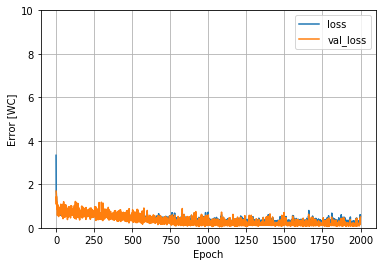

In [48]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [WC]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [49]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 0us/step


0.4692533314228058

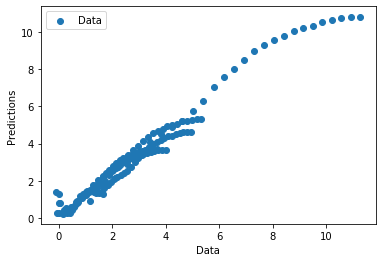

In [50]:

plt.scatter(outputs, model.predict(inputs), label='Data')
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [53]:
#individual prediction

#dataset input
x = inputs.iloc[3:4]
y = outputs.iloc[3:4]
#manual input 
# 'PC1 [nA]','PC2 [nA]','PC3 [nA]','PC4 [nA]','XL [-]','aw1','aw2','aw3','aw4','ao1','ao2','ao3','ao4'
#x = pd.DataFrame([[25195.03,239.13,12856.83,1987.97,1.033,-0.0170,2.9304,0.5466,0.5366,3.1292,2.4890,1.8896,3.0607]])
#y = '97.91'


print('prediction = ', model.predict(x) )
print('Trained value = ', y )

prediction =  [[0.90658987 0.5776395  0.2546404  1.3620324  0.38762712]]
Trained value =       AO1    AO2    AO3    AO4   AO5
3  1.167  0.468  0.286  1.487  0.38
